

## <center> Polytechnique Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8008 – Prétraitement de données <br> . <br> TP3  - Échantillonnage et imputations <br>  Hiver 2025 <br> . <br> 17 février 2025 </center>

## Introduction

Le TP3 porte principalement sur l'échantillonnage et l'imputation, mais nous aborderons tout de même l'agrégation, la tabulation, le remodelage, le pivotement et les statistiques descriptives.  <b> Nous survolons l'utilisation de fonctions de base de Pandas et de l'analyse de données numériques. </b>

Dans ce travail, vous aurez à utiliser les données des deux fichiers .csv suivants :

 - <b> appointments.csv </b> : Matrice de données de 100 000 rendez-vous faits par 943 patients et portant sur 1682 docteurs;
 - <b> patients.csv </b> : Matrice de données sur les patients.

Ces données ont été générées synthétiquement par un grand modèle de langage pour approximer les interactions réelles dans le domaine des soins de santé tout en garantissant la confidentialité des données.



Voici les librairies python qui seront à utiliser pour ce TP :
- [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html)
- [numpy](https://numpy.org/doc/stable/user/basics.html)
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)





In [76]:
import pandas as pd
import numpy as np

In [84]:
df_appointments = pd.read_csv('appointments.csv')
df_patients = pd.read_csv('patients.csv')

In [85]:
df_patients

,id,age,gender,condition,zip
0,1,24,F,Healthy,85711
1,2,54,M,Diabetes,94043
2,3,69,M,Healthy,32067
3,4,43,M,Diabetes,43537
4,5,44,M,Hypertension,15213
...,...,...,...,...,...
938,939,71,M,Healthy,33319
939,940,33,F,Diabetes,2215
940,941,20,M,Asthma,97229
941,942,76,M,Diabetes,78209


In [86]:
df_appointments

,patient.id,doctor.id,niveau.recommandation,date
0,938,588,4,2021-01-15
1,81,1083,4,2021-11-26
2,890,1144,2,2021-05-05
3,428,18,5,2021-06-09
4,483,1130,5,2021-01-26
...,...,...,...,...
96943,351,435,4,2021-01-12
96944,187,1246,3,2021-01-05
96945,748,560,5,2021-06-16
96946,285,1429,3,2021-05-14


## Prédiction de recommendations par factorisation de matrice
<b> Mise en contexte : </b>

Un principe fondamental des systèmes de recommandations est de prédire les rendez-vous des patients aux docteurs qui n’ont pas encore de rendez-vous et sont présumés des candidats à recommander. On recommande alors les docteurs dont les rendez-vous estimés sont les plus élevés. Une méthode très facile à implémenter consiste à factoriser une matrice de rendez-vous dans un espace à dimensions réduites puis à effectuer le produit des matrices factorisées. Ce produit constitue la prédiction des rendez-vous sur la base de réduction de dimensions.

Le fichier appointments.csv contient 100 000 rendez-vous de 943 patients pour 1682 docteurs. Il faut, dans un premier temps, créer cette matrice et ensuite la factoriser en un produit de matrices dont le rang est plus petit. Mais la matrice originale contient un grand nombre de valeurs manquantes et il est nécessaire d’effectuer une imputation avant la factorisation par des méthodes analytiques, notamment la méthode de décomposition en valeurs singulières que nous utiliserons (SVD).

De plus, il faut aussi effectuer une validation croisée afin de déterminer le bon nombre dimensions pour la factorisation ainsi que s’il est préférable de faire une imputation de valeurs aléatoires, de la moyenne des lignes, ou de la moyenne des lignes et des colonnes.

### A)
Mettez les données de "df_appointments" sous la forme d'une matrice de rendez-vous patients $\times$ docteurs. <b>(1.5 points)</b>

Pour ce faire:
1. Retirez la colonne "date" du DataFrame "df_appointments".
2. Triez les données par "patient.id" et "doctor.id".
3. Regroupez les données par "patient.id" et faites l'agrégation des "niveau.recommandation" pour chaque "doctor.id".
4. Convertissez en matrice.

Affichez les dimensions de la matrice, celle-ci devrait être de "shape" (943, 1682).

In [80]:
#TODO: Nomez votre matrice R, pour bien continuer le reste.
df_appointments.drop(columns=['date'] , inplace=True) 
df_appointments.sort_values(by=['patient.id' , 'doctor.id'] , inplace=True)
df_appointments = df_appointments.groupby(["patient.id", "doctor.id"])["niveau.recommandation"].mean().unstack()
appointments_matrix = df_appointments.to_numpy()

In [81]:
appointments_matrix.shape

(943, 1682)

In [82]:
appointments_matrix

array([[nan,  5., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 1., nan,  2., ..., nan, nan, nan],
       ...,
       [nan,  2., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan,  5.],
       [nan, nan,  4., ..., nan, nan, nan]])


### B)
Pour factoriser une matrice, elle ne doit contenir aucune valeur manquante.  Imputez (remplacez) les valeurs manquantes (valeurs non observées) dans la matrice créée précédemment selon les trois méthodes suivantes : <b>(2.5 points)</b>  
1. Remplacer les "nan" par des valeurs aléatoires d'une distribution normale (0,1).
2. Remplacer les "nan" par la moyenne des lignes.
3. Remplacer les "nan" par la moyenne des lignes et colonnes.

Affichez la matrice obtenue pour chaque méthode.



In [110]:
#nan_mask = np.isnan(R)
#valeursObservees = ~np.isnan(R)

#TODO:

# Method 1: Remplacer les "nan" par des valeurs aléatoires d'une distribution Normale (0,1)
# Copie de la matrice pour éviter de modifier l'originale
matrix_random = appointments_matrix.copy()

# Remplacement des NaN par des valeurs aléatoires N(0,1)
random_values = np.random.randn(*matrix_random.shape)  # Génération de valeurs aléatoires
matrix_random = np.where(np.isnan(matrix_random), random_values, matrix_random)

print(f"Méthode 1: \n {matrix_random}" )

# Method 2: Remplacer les "nan" par la moyenne des lignes
row_mean = np.nanmean(appointments_matrix , axis = 1 , keepdims=True)
matrix_row_mean = np.where(np.isnan(appointments_matrix), row_mean, appointments_matrix)
print(f"Méthode 2: \n {matrix_row_mean}" )

# Method 3: Remplacer les "nan" par la moyenne des lignes et colonnes
col_mean = np.nanmean(appointments_matrix , axis = 0 , keepdims=True)
matrix_col_mean = np.where(np.isnan(appointments_matrix), col_mean, appointments_matrix)
matrix_row_col_mean = (matrix_col_mean + matrix_row_mean ) /2
print(f"Méthode 3: \n {matrix_row_col_mean}" )

Méthode 1: 
 [[ 1.08478816  5.         -1.75220106 ...  1.09213835  1.38971964
  -0.07157984]
 [-0.09466362  0.23469598 -0.05167663 ... -0.75984657  0.4875728
  -0.1119785 ]
 [ 1.         -0.67009324  2.         ... -0.03058098  1.81076569
  -1.69178952]
 ...
 [ 0.94872992  2.         -1.41512978 ... -1.46370422  1.72568886
  -0.45354443]
 [-1.38451675 -1.63101408  1.25255723 ...  0.68444305  0.28926504
   5.        ]
 [-0.15187108  1.1542327   4.         ... -0.55551179 -1.68674603
   0.26875027]]
Méthode 2: 
 [[3.35185185 5.         3.35185185 ... 3.35185185 3.35185185 3.35185185]
 [2.78431373 2.78431373 2.78431373 ... 2.78431373 2.78431373 2.78431373]
 [1.         2.70873786 2.         ... 2.70873786 2.70873786 2.70873786]
 ...
 [2.95614035 2.         2.95614035 ... 2.95614035 2.95614035 2.95614035]
 [3.18691589 3.18691589 3.18691589 ... 3.18691589 3.18691589 5.        ]
 [3.07526882 3.07526882 4.         ... 3.07526882 3.07526882 3.07526882]]
Méthode 3: 
 [[3.33956229 5.         3.

### C)

<b> Mise en contexte: </b>

Il faut maintenant effectuer une validation croisée à 5 replis en échantillonnant aléatoirement 5 ensembles de rendez-vous parmi les 100 000 rendez-vous observés qui serviront tour à tour d’ensemble de test, les autres étant utilisées pour l’entraînement (estimation des matrices de factorisation).

Pour ce faire, utilisez la fonction <code>validation_croisee_replis()</code> qui effectue une validation croisée par replis de la factorisation SVD et retourne l’erreur quadratique moyenne. Elle utilise une matrice, <code>echantillonReplis</code>, dont chaque ligne contient l’indice des observations de test pour chaque "replis" et qui est créée plus loin.

Utilisez la variable <code>valeurs_observees</code> (obtenue à l'aide de la matrice créer dans la partie "A" ci-dessus) et la fonction <code>random.choice()</code> de numpy.

Affichez les dimensions de l'échantillon, vous devriez avoir (5, 19389). <b> (1 point) </b>


In [71]:
from validation_croisee import validation_croisee_replis, validation_croisee

In [138]:
n_dimensions = 14
nombre_replis = 5
valeurs_observees = ~np.isnan(appointments_matrix)
#valeurs_observees = np.argwhere(~np.isnan(appointments_matrix))

indices_observations = np.flatnonzero(valeurs_observees)
#indices_observations = np.arange(96948)
#np.random.shuffle(indices_observations)  # Mélanger les indices
echantillonReplis = np.array_split(indices_observations, nombre_replis) 
#print("Dimensions de echantillonReplis :", len(echantillonReplis))  

echantillonReplis = np.array([np.random.choice(repli, 19389, replace=False) for repli in echantillonReplis])

# Vérification des dimensions
print("Dimensions de echantillonReplis :", echantillonReplis.shape)  # Devrait afficher (5, 19389)




Dimensions de echantillonReplis : (5, 19389)


In [127]:
echantillonReplis = np.array([np.random.choice(repli, 19389, replace=False) for repli in echantillonReplis])

echantillonReplis

array([[ 5532, 10952,  9603, ..., 17655, 16404,  4562],
       [36401, 36267, 37277, ..., 38583, 36395, 21919],
       [53255, 54853, 49085, ..., 41472, 46208, 45201],
       [69295, 77335, 76095, ..., 60557, 67849, 70398],
       [92699, 94373, 84671, ..., 84398, 83654, 82805]])

### D)

Pour chacune des 3 méthodes d'imputation utilisées précédemment, affichez le résultat de la validation croisée. <b> (0.5 point) </b>

Les résultats qui seront affichés pour chaque méthode devraient être similaire à ceux-ci:
1. Méthode 1 : array([3.07936543 2.97096366 3.00239858 2.98364498 3.07552508]).

2. Méthode 2 : array([1.35600187 1.36579327 1.37056779 1.35480193 1.3561739]).

3. Méthode 3 : array([1.34846446 1.36657222 1.3627661  1.3456932  1.34794998]).


In [139]:
#TODO: Méthode 1
method1_results = validation_croisee_replis(appointments_matrix , matrix_random, echantillonReplis, valeurs_observees, n_dimensions)

In [140]:
#TODO: Méthode 2
method2_results = validation_croisee_replis(appointments_matrix , matrix_row_mean, echantillonReplis, valeurs_observees, n_dimensions)

In [141]:
#TODO: Méthode 3
method3_results = validation_croisee_replis(appointments_matrix , matrix_row_col_mean, echantillonReplis, valeurs_observees, n_dimensions)

In [142]:
print ("Méthode 1 : ")
print(method1_results)
print ("Méthode 2 : ")
print(method2_results)
print ("Méthode 3 : ")
print(method3_results)

Méthode 1 : 
[3.04015733 3.01171621 3.01839325 3.04032026 3.04676561]
Méthode 2 : 
[1.35162898 1.35446866 1.35246811 1.35033949 1.35716492]
Méthode 3 : 
[1.34558804 1.34812052 1.34689482 1.34359924 1.35109316]


Affichez les résultats de la validation croisée pour chaque méthode (Méthode 1, Méthode 2, Méthode 3) sur un seul graphique en boîte à moustaches (boxplot). <b> (2 points) </b>

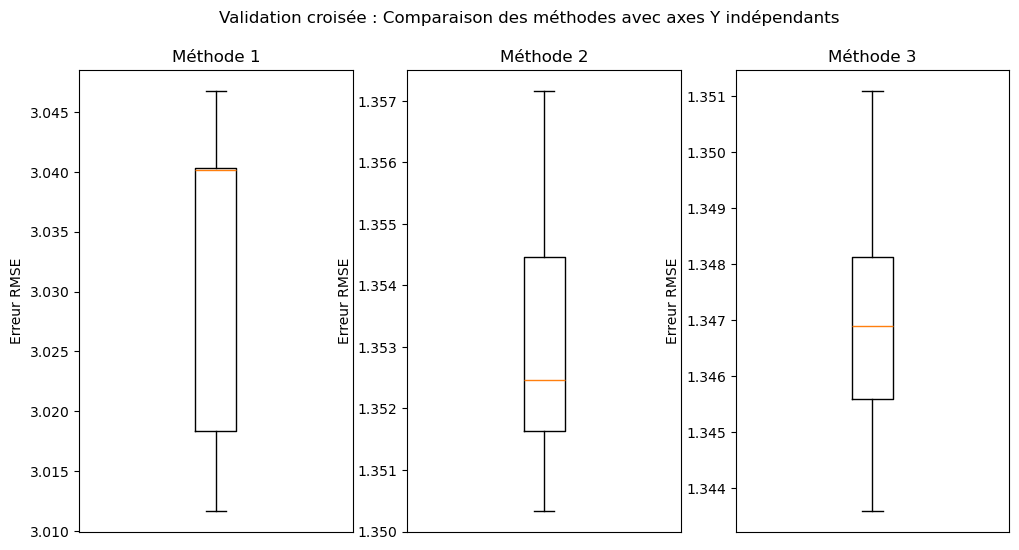

In [157]:
# TODO:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=False)  # Désactivation du partage de l'axe Y

# Méthode 1
axes[0].boxplot(method1_results)
axes[0].set_title("Méthode 1")
axes[0].set_ylabel("Erreur RMSE")
axes[0].set_xticks([])

# Méthode 2
axes[1].boxplot(method2_results)
axes[1].set_title("Méthode 2")
axes[1].set_xticks([])
axes[1].set_ylabel("Erreur RMSE")

# Méthode 3
axes[2].boxplot(method3_results)
axes[2].set_title("Méthode 3")
axes[2].set_xticks([])
axes[2].set_ylabel("Erreur RMSE")

# Ajustement de la mise en page
fig.suptitle("Validation croisée : Comparaison des méthodes")
plt.show()
# Affichage


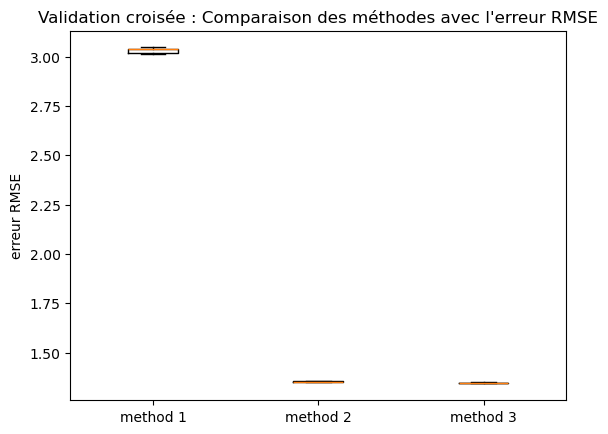

In [161]:
# Création d'un boxplot avec des sous-graphiques pour chaque méthode avec des axes Y indépendants

plt.figure() 
plt.boxplot([method1_results , method2_results , method3_results] , labels = ['method 1' , 'method 2' , 'method 3'])
plt.ylabel('erreur RMSE')


plt.title("Validation croisée : Comparaison des méthodes avec l'erreur RMSE")
plt.show()

### E)
Explorez le nombre de dimensions qui est optimal par visualisation de la performance prédictive en fonction du nombre de dimensions. Prenez la moyenne par ligne et colonne comme imputation et cet ensemble de dimensions à explorer : (2, 4, 8, 10, 15, 20, 40). N’utilisez qu’un échantillon de données.  <b>(1 point)</b>

Pour ce faire:
1. Calculez l'erreur quadratique pour chaque dimension.
2. Affichez dans un graphique l'erreur quadratique selon le nombre de dimensions.

*Note: Le graphique doit utiliser des marqueurs de type 'o' et un style de ligne '-'. N'oubliez pas de nommer les axes et de donner un titre.*



In [ ]:
import matplotlib.pyplot as plt

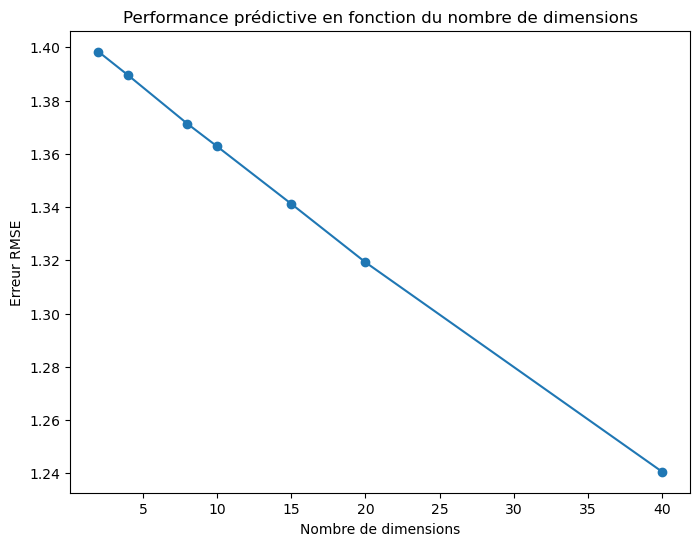

In [158]:
#TODO:


dimensions_a_explorer = [2, 4, 8, 10, 15, 20, 40]
erreurs_rmse_par_dimension = []
echantillon_test = echantillonReplis[0]

# Calcul de l'erreur pour chaque dimension
for n_dim in dimensions_a_explorer:
    erreur_rmse = validation_croisee(
        appointments_matrix,
        matrix_row_col_mean,
        echantillon_test,
        valeurs_observees,
        n_dim
    )
    erreurs_rmse_par_dimension.append(erreur_rmse)

plt.figure(figsize=(8, 6))
plt.plot(dimensions_a_explorer, erreurs_rmse_par_dimension, marker='o', linestyle='-')


plt.title("Performance prédictive en fonction du nombre de dimensions")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Erreur RMSE")

# Affichage
plt.show()


## Probabilités bayésiennes

<b> Mise en contexte : </b>

La seconde approche de prédiction est basée sur les probabilités conditionnelles avec des ratios de vraisemblance. Ces calculs nécessitent des tableaux de contingences entre deux variables, la variable à prédire et le facteur de prédiction. Nous voudrons prédire si un individu est susceptible de recommender un docteur en fonction de trois variables, son sexe, son âge et sa condition de santé. Il nous faut donc créer les tableaux suivants.


### F)

Créez un tableau des données de rendez-vous et des patients.

Pour ce faire:
1. Renommez la colonne "patients.id" du DataFrame appointments par "id ".
2. Faites un left-join de nouveau DataFrame créé avec le DataFrame des patients.
3. Enlevez les colonnes "date" et " zip".
4. Ajoutez une nouvelle colonne "recommande" qui est à True si le "niveau.recommandation" est supérieur à 4.

Affichez le nouveau tableau. <b> (1 point) </b>

In [ ]:
# TODO:

### G)

Créez un nouveau tableau "recommande_gender" qui présente la proportion de patients qui recommande ou qui ne recommande pas un docteur.

Pour ce faire :
1. À partir du DataFrame "appointments", regroupez les données par "doctor.id" et par "gender".
2. Appliquez la fonction "recommande_tbl" sur la colonne "recommande" et réinitialisez l'index.
3. Créez un "pivot table" dont l'index est "doctor.id", la colonne est " gender ", les valeurs sont "recommande" et "recommandePas", puis utilisez la sommation comme fonction d'agrégation.
4. Créez une colonne "LS" à l'aide de la fonction "ratio_vraisemblance" qui contient le résultat du ratio de vraisemblance. Voici les paramètres à donner à cette fonction :
  - EH:  recommande_gender[('recommande', 'F')]
  - EnH: recommande_gender[('recommandePas', 'F')]
  - nEH: recommande_gender[('recommande', 'M')]
  - nEnH: recommande_gender[('recommandePas', 'M')]

*Note: La valeur LS de votre 1ère ligne devrait être environ 1.147059.*

Affichez le nouveau DataFrame. <b> (1 point) </b>


In [ ]:
def recommande_tbl(x):
    return pd.DataFrame({'recommande': [sum(x)], 'recommandePas': [sum(1-x)]})

def ratio_vraisemblance(EH, EnH, nEH, nEnH):
    return ((EH+1)/(EH+nEH+2))/((EnH+1)/(EnH+nEnH+2))

In [ ]:
# TODO:

### H)
Affichez dans un graphique à barres la valeur LS pour les dix premiers "doctor.id" en utilisant le tableau "recommande_gender". <b> (0.5 point) </b>

*Note: N'oubliez pas de nommer vos axes et votre graphique.*

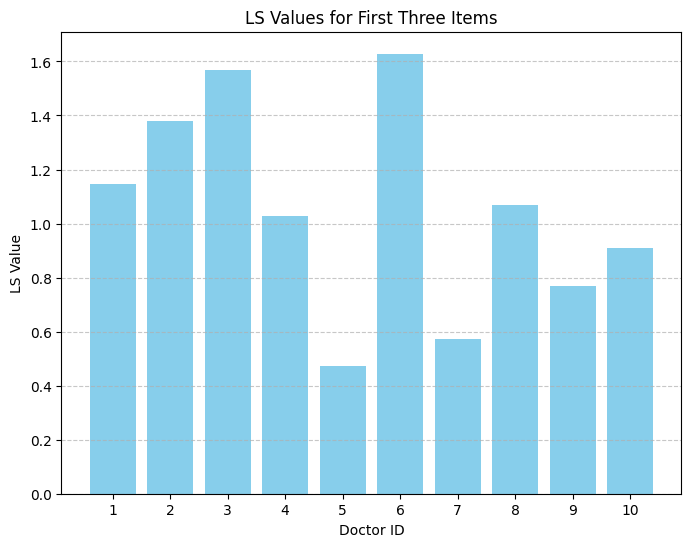

In [ ]:
import matplotlib.pyplot as plt

# TODO:

## 3. LIVRABLES
Vous devez remettre sur Moodle un fichier compressé .zip contenant :

1) Le code : Un Jupyter notebook en Python qui contient le code tel implanté avec les librairies minimales demandées pour ce TP (Python, Pandas, Matplotlib). Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière. Tous vos résultats doivent être reproductibles avec le code dans le notebook. *Attention, en aucun cas votre code ne doit avoir été copié de d'ailleurs.*

2) Un fichier pdf représentant votre notebook complètement exécuté sous format pdf (obtenu via latex ou imprimé en pdf avec le navigateur). Assurez-vous que le PDF est entièrement lisible. [Tutoriel youtube](https://www.youtube.com/watch?v=-Ti9Mm21uVc)

ATTENTION: assurez-vous que votre fichier compressé .zip ne dépasse pas la taille limite acceptée sur Moodle.


__ÉVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.) <b>(1 point)</b>
3. Réponses correctes/sensées aux questions de réflexion ou d'analyse

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter avec d'autres équipes. Cependant, vous ne pouvez en aucun cas incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement.

### Conversion en PDF sur Google Colab

In [ ]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Assurez vous d'avoir téléchargé le TP complété en notebook sur votre ordinateur, puis importé ce fichier dans le répertoire "content" avant de rouler la ligne suivante.

In [ ]:
!jupyter nbconvert --to pdf /content/TP1.ipynb